In [43]:
import numpy as np
from scipy.stats import binom

In [44]:
binom.rvs(n = 1, p =  0.5, size = 5)

array([1, 1, 0, 1, 0])

In [45]:
def tirar_moneda(p, sample_size = 5 ):
  return binom.rvs(n = 1, p =  p, size = sample_size)
tirar_moneda(.5)

array([0, 1, 1, 0, 0])

$H_0: p \leq 0.5$ \\
Vamos a querer, tirando una moneda ***5*** veces, disieñar un test que nos diga "rechazar si una proporción q de las tiradas salió cara" con un error de tipo $I$ menor a 5 *%* y un error de tipo $II$ menor a 20 *%*

In [46]:
# Error de tipo I: la proba de condenar a un inocente
# Rechazo H_0 siendo H_0 cierta
tirada = tirar_moneda(p = 0.5) # estoy en H_0
cant_caras = np.sum(tirada)
if cant_caras >= 4:
  print("Rechazo H_0")
else:
  print("No rechazo H_0")

No rechazo H_0


In [47]:
 # Me interesa ver cuán frecuentemente rechazo dado que estoy en H_0
n_experiments = 10_000
n_rejected = 0

for _ in range(n_experiments):
  tirada = tirar_moneda(p = 0.5) # estoy en H_0
  cant_caras = np.sum(tirada)
  if cant_caras >= 4:
    n_rejected += 1

n_rejected / n_experiments

0.1916

In [48]:
# p_target = candidato para error de tipo II
# q_umbral de cantidad de rechazos

def power_function(p_target, q_umbral, sample_size = 5, n_experiments = 10_000):
  n_rejected = 0
  for _ in range(n_experiments):
    tirada = tirar_moneda(p = p_target, sample_size = sample_size) # estoy en p_target
    cant_caras = np.sum(tirada)
    proporcion_caras = cant_caras / sample_size
    if proporcion_caras >= q_umbral:
      n_rejected += 1
  return n_rejected / n_experiments


In [49]:
# Error de tipo I
power_function(0.5, 0.8)

0.182

In [50]:
# Error de tipo II
p_alternativo = 0.6
1 - power_function(p_alternativo, .8)

0.6628000000000001

In [51]:
# cuenta del cuaderno
1 -0.6**4*(2.6)

0.6630400000000001

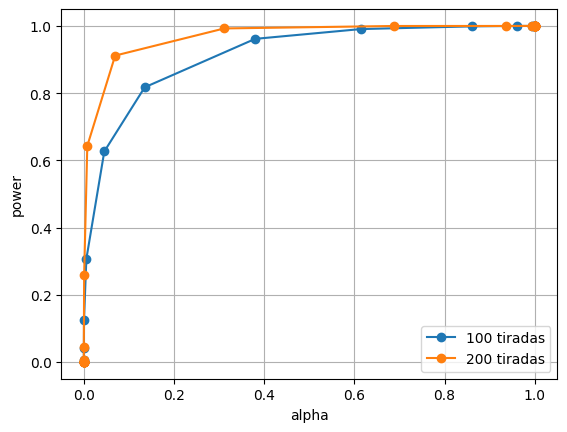

In [52]:
import matplotlib.pyplot as plt
# va a variar la cantidad de caras para rechazar
# y también la cantidad de tiradas
# calcular distintos errores para los != valores del umbral

q_umbrales = np.linspace(0, 1, 30)
p_alternativo = 0.6
sample_sizes = [100,200]

for sample_size in sample_sizes:
  tiposI = []
  tiposII = []
  for q in q_umbrales:
    tiposI.append(power_function(.5,q,sample_size))
    tiposII.append(power_function( p_alternativo, q, sample_size))
  plt.plot(tiposI, tiposII, marker = "o", label = f'{sample_size} tiradas')
plt.grid()
plt.xlabel("alpha")
plt.ylabel("power")
plt.legend()
